## House Price Prediction

## Data Cleaning & Preprocessing

In [466]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pandas as pd  
import numpy as np

In [467]:
import pandas as pd

In [468]:
# listings = pd.read_csv(r'C:\Users\Sharvani Pratinidhi\Desktop\Marlabs\POC\listings.csv')
link_listings = 'https://drive.google.com/open?id=12BVI5GdUD54hmM3uZmPWnS6EtmQinV42'

In [469]:
fluff, id = link_listings.split('=')
print (id) # Verify that you have everything after '='

12BVI5GdUD54hmM3uZmPWnS6EtmQinV42


In [470]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('listings.csv')  
listings = pd.read_csv('listings.csv')
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,W

In [471]:
listings.shape

(48377, 106)

### Dropping the irrelavent columns

In [472]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
                'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules','latitude','longitude', 
                'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 
                'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                'host_neighbourhood', 'host_verifications', 'calendar_last_scraped','experiences_offered',
                'host_acceptance_rate','street','city','state','zipcode','country_code','country',
                'is_location_exact','license','jurisdiction_names','is_business_travel_ready','square_feet',
               'weekly_price','monthly_price','last_review','first_review','maximum_nights_avg_ntm','minimum_nights_avg_ntm',
                'maximum_maximum_nights','minimum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights','host_has_profile_pic',
                'has_availability','require_guest_profile_picture', 'require_guest_phone_verification','requires_license','host_total_listings_count', 
                'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
listings = listings.drop(cols_to_drop, axis=1)


In [473]:
listings.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,market,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,3647,2008-11-25,a few days or more,0%,f,1.0,t,Harlem,Harlem,Manhattan,New York,"New York, NY",Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,7,37 months ago,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN
1,3831,2008-12-07,within an hour,92%,f,1.0,t,Brooklyn,Clinton Hill,Brooklyn,New York,"Brooklyn, NY",Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,730,3 days ago,1,3,8,192,279,67,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,4.62
2,5022,2009-01-29,NaN,NaN,f,1.0,t,East Harlem,East Harlem,Manhattan,New York,"New York, NY",Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,120,6 months ago,0,0,0,0,9,2,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,0.10
3,5099,2009-02-02,within a day,78%,f,1.0,f,Midtown East,Murray Hill,Manhattan,New York,"New York, NY",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,21,today,3,3,13,13,75,10,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,0.59
4,5121,2009-02-03,a few days or more,0%,f,1.0,f,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,New York,"Brooklyn, NY",Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,730,20 months ago,0,0,0,0,49,0,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,0.39


#### Host_since

#### Calculating the host_active_days from Host_since date

In [474]:
df=listings
from datetime import datetime
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2020, 9, 1) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1931.0
Median days as host: 1935.0


**Host_response_time**

In [475]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.394712
unknown               0.339335
within a few hours    0.153441
within a day          0.093950
a few days or more    0.018563
Name: host_response_time, dtype: float64

**One Hot Encoding for the amenities**

In [476]:
l=[[word.strip('[" ]') for word in row[1:-1].split(',')] for row in list(df['amenities'])]
#for demonstration, reducing data to 100 rows
l=l[:100]#remove this line to include whole data
cols=set(word for row in l  for word in row)

df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Game console'), 'Game console'] = 1
df.loc[df['amenities'].str.contains('BBQ grill'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV|Cable TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics|Kitchen|Refrigirator|Stove|Oven|Dishwasher|Dishes|silverware'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Carbon monoxide detector|Smoke detector|Fire extinguisher'), 'Smoked_detection'] = 1
df.loc[df['amenities'].str.contains('parking|Parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Hair dryer|shampoo'), 'Bathroom_amenities'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children|Changing table|child_friendly|Baby|crib|High chair'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('Dryer|Washer|Washer/Dryer'),'Laundry'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Garden|Backyard'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi|Ethernet connection'),'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safety card|Keypad|Smart lock|Lock|Buzzer'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('Pool'), 'pool'] = 1
df.loc[df['amenities'].str.contains('Heating'), 'Heating'] = 1
df.loc[df['amenities'].str.contains('Falt path to guest entrance|Wheelchair|No staris or steps|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Well-lit path to entrance'), 'well_lit_entrance'] = 1
df.loc[df['amenities'].str.contains('Essentials'), 'essentials'] = 1
df.loc[df['amenities'].str.contains('Indoor fireplace'), 'indoor_fireplace'] = 1  

#### Binning Multiple Columns

In [477]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [478]:
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [479]:
bin_column('review_scores_value',
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')


In [480]:
df.review_scores_rating.value_counts()

95-100/100    20904
80-94/100     13953
nan           10561
0-79/100       2959
Name: review_scores_rating, dtype: int64

In [481]:
df.review_scores_value.value_counts()

10/10     21048
9/10      12921
nan       10618
0-8/10     3790
Name: review_scores_value, dtype: int64

#### Host_Response_rate

In [482]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 16416
Proportion: 33.9%


In [483]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")


Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 65.6%


In [484]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       20961
unknown    16416
50-89%      5582
90-99%      4033
0-49%       1385
Name: host_response_rate, dtype: int64

In [485]:
df[df.columns[45:]] = df[df.columns[45:]].fillna(value=0)
df_zero_new_amm=df.copy()

In [486]:
df.iloc[:,45:]

,check_in_24h,air_conditioning,Game console,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,Smoked_detection,parking,Bathroom_amenities,child_friendly,Laundry,elevator,gym,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,event_suitable,pool,Heating,accessible,well_lit_entrance,essentials,indoor_fireplace
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48375,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [487]:
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,market,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,host_days_active,check_in_24h,air_conditioning,Game console,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,Smoked_detection,parking,Bathroom_amenities,child_friendly,Laundry,elevator,gym,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,event_suitable,pool,Heating,accessible,well_lit_entrance,essentials,indoor_fireplace
0,3647,2008-11-25,a few days or more,0-49%,f,1.0,t,Harlem,Harlem,Manhattan,New York,"New York, NY",Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,7,37 months ago,30,60,90,365,0,0,nan,NaN,NaN,NaN,NaN,NaN,nan,f,strict_14_with_grace_period,NaN,4298.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3831,2008-12-07,within an hour,90-99%,f,1.0,t,Brooklyn,Clinton Hill,Brooklyn,New York,"Brooklyn, NY",Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,730,3 days ago,1,3,8,192,279,67,80-94/100,9.0,9.0,10.0,9.0,10.0,9/10,f,moderate,4.62,4286.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,5022,2009-01-29,unknown,unknown,f,1.0,t,East Harlem,East Harlem,Manhattan,New York,"New York, NY",Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,120,6 months ago,0,0,0,0,9,2,80-94/100,10.0,9.0,10.0,10.0,9.0,10/10,f,strict_14_with_grace_period,0.10,4233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,5099,2009-02-02,within a day,50-89%,f,1.0,f,Midtown East,Murray Hill,Manhattan,New York,"New York, NY",Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,21,today,3,3,13,13,75,10,80-94/100,10.0,9.0,10.0,10.0,9.0,9/10,f,moderate,0.59,4229.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5121,2009-02-03,a few days or more,0-49%,f,1.0,f,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,New York,"Brooklyn, NY",Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,730,20 months ago,0,0,0,0,49,0,80-94/100,8.0,8.0,10.0,10.0,9.0,9/10,f,strict_14_with_grace_period,0.39,4228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [488]:
df.shape

(48377, 79)

#### Dropping the skewd amenities 

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48377 entries, 0 to 48376
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            48377 non-null  int64         
 1   host_since                    48356 non-null  datetime64[ns]
 2   host_response_time            48377 non-null  object        
 3   host_response_rate            48377 non-null  object        
 4   host_is_superhost             48356 non-null  object        
 5   host_listings_count           48356 non-null  float64       
 6   host_identity_verified        48356 non-null  object        
 7   neighbourhood                 48365 non-null  object        
 8   neighbourhood_cleansed        48377 non-null  object        
 9   neighbourhood_group_cleansed  48377 non-null  object        
 10  market                        48275 non-null  object        
 11  smart_location              

In [490]:
for col in df.columns:
    val_count = df[col].value_counts(normalize = True)
    for category in val_count:
        if category < 0.05:
            print(col)
            break

id
host_since
host_response_time
host_response_rate
host_listings_count
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
market
smart_location
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
cancellation_policy
reviews_per_month
host_days_active
Game console
bbq
nature_and_views
internet
smoking_allowed
event_suitable
pool
indoor_fireplace


In [491]:
col_name = ['Game console','bbq','nature_and_views','internet','smoking_allowed','pool','event_suitable','indoor_fireplace']
df_zero_new_amm = df_zero_new_amm.drop(columns = col_name,axis = 1)
df_new_final = df_zero_new_amm.copy()
 

#### Converting the string attrs into int



In [492]:
df_new_final.price = df_new_final.price.str[1:-3]
df_new_final.price = df_new_final.price.str.replace(",", "")
df_new_final.price = df_new_final.price.astype('int64')

In [493]:
df_new_final.security_deposit = df_new_final.security_deposit.str[1:-3]
df_new_final.security_deposit = df_new_final.security_deposit.str.replace(",", "")
df_new_final.security_deposit.fillna(0, inplace=True)

In [494]:
df_new_final['security_deposit'] = df_new_final['security_deposit'].astype(int)

In [495]:
df_new_final.cleaning_fee = df_new_final.cleaning_fee.str[1:-3]
df_new_final.cleaning_fee = df_new_final.cleaning_fee.str.replace(",", "")
df_new_final.cleaning_fee.fillna(0, inplace=True)

In [496]:
df_new_final['cleaning_fee'] = df_new_final['cleaning_fee'].astype(int)

In [497]:
df_new_final.extra_people = df_new_final.extra_people.str[1:-3]
df_new_final.extra_people = df_new_final.extra_people.str.replace(",", "")
df_new_final.extra_people = df_new_final.extra_people.astype('int64')

#### Beds, Bathroom, Bedrooms

In [498]:
col = ['beds','bathrooms', 'bedrooms']
for c in col:
  df_new_final[c].fillna(df_new_final[c].median(),inplace = True) 

In [499]:
df_new_final.drop('bed_type', axis=1, inplace=True)
df_new_final.drop('calendar_updated', axis=1, inplace=True)
df_new_final.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)
df_new_final.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

#### Binning the property types

In [500]:
df_new_final.property_type.replace({
    'Townhouse': 'House',
    'Condominium': 'Apartment',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Aparthotel': 'Apartment',
    'Guest suite': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House' 
    }, inplace=True)

# Replacing other categories with 'other'
df_new_final.loc[~df_new_final.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'


In [501]:
# df[['availability_30','availability_60','availability_90','availability_365']]
# df.columns
df_new_final.drop(['availability_30','availability_60','availability_90'], axis=1, inplace=True)

In [502]:
df_new_final.drop([ 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location'], axis=1, inplace=True)

In [503]:
df_new_final.host_identity_verified = df_new_final['host_identity_verified'].replace('f',0)
df_new_final.host_identity_verified = df_new_final['host_identity_verified'].replace('t',1)
df_new_final.host_is_superhost = df_new_final['host_is_superhost'].replace('f',0)
df_new_final.host_is_superhost = df_new_final['host_is_superhost'].replace('t',1)

In [504]:
df_new_final.host_identity_verified.value_counts()

0.0    25331
1.0    23025
Name: host_identity_verified, dtype: int64

In [505]:
df_new_final.drop('amenities',axis=1,inplace=True)

In [506]:
feature_df = df_new_final.copy()

In [507]:
column = ["neighbourhood","smart_location","neighbourhood_cleansed","host_since"]

In [508]:
feature_df = feature_df.drop(columns = column, axis = 1)  

In [509]:
feature_df = feature_df.drop(columns = "market", axis = 1)

In [510]:
feature_df['review_scores_value'].value_counts()

10/10     21048
9/10      12921
nan       10618
0-8/10     3790
Name: review_scores_value, dtype: int64

In [511]:
feature_df.columns

Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_value',
       'instant_bookable', 'cancellation_policy', 'host_days_active',
       'check_in_24h', 'air_conditioning', 'balcony', 'bed_linen', 'breakfast',
       'tv', 'coffee_machine', 'cooking_basics', 'Smoked_detection', 'parking',
       'Bathroom_amenities', 'child_friendly', 'Laundry', 'elevator', 'gym',
       'outdoor_space', 'host_greeting', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'Heating', 'accessible',
       'well_lit_entrance', 'essentials'],
      dtype

#### One hot encoding for the categorical attrs

In [512]:
transformed_df = pd.get_dummies(feature_df)

In [513]:
transformed_df.shape

(48377, 79)

In [514]:
transformed_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,Smoked_detection,parking,Bathroom_amenities,child_friendly,Laundry,elevator,gym,outdoor_space,host_greeting,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,Heating,accessible,well_lit_entrance,essentials,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_rating_nan,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,review_scores_value_nan,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
0,3647,0.0,1.0,1.0,2,1.0,1.0,1.0,150,200,75,2,20,3,7,365,0,4298.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1
1,3831,0.0,1.0,1.0,3,1.0,1.0,4.0,89,500,0,1,0,1,730,192,279,4286.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,5022,0.0,1.0,1.0,1,1.0,1.0,1.0,80,100,80,1,20,10,120,0,9,4233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,5099,0.0,1.0,0.0,2,1.0,1.0,1.0,200,300,125,2,100,3,21,13,75,4229.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
4,5121,0.0,1.0,0.0,2,1.0,1.0,1.0,60,450,0,1,30,45,730,0,49,4228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [515]:
transformed_df.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'host_days_active', 'check_in_24h',
       'air_conditioning', 'balcony', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'Smoked_detection', 'parking',
       'Bathroom_amenities', 'child_friendly', 'Laundry', 'elevator', 'gym',
       'outdoor_space', 'host_greeting', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'Heating', 'accessible',
       'well_lit_entrance', 'essentials',
       'host_response_time_a few days or more', 'host_response_time_unknown',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_ra

#### Correaltion

In [516]:
%matplotlib inline

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [517]:
#Co-related Feature
correlated_features = set()
correlation_matrix = transformed_df.drop('price', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [518]:
correlated_features

{'beds',
 'host_response_rate_0-49%',
 'host_response_rate_unknown',
 'instant_bookable_t',
 'property_type_House',
 'review_scores_value_nan',
 'room_type_Private room'}

In [519]:
li = ['beds',
 'host_response_rate_0-49%',
 'host_response_rate_unknown',
 'instant_bookable_t',
 'property_type_House',
 'review_scores_value_nan',
 'room_type_Private room']
li.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

In [520]:
transformed_df.drop(li, axis=1, inplace=True)

In [521]:
transformed_df.shape

(48377, 71)

#### Replacing null values and removing outliers

In [522]:
transformed_df[['host_is_superhost','host_identity_verified']] = transformed_df[['host_is_superhost','host_identity_verified']].fillna(value=0)

In [523]:
transformed_df['host_listings_count'].fillna(transformed_df['host_listings_count'].median(),inplace = True) 

In [524]:
transformed_df = transformed_df[(transformed_df['price'] < 500)]

In [525]:
transformed_df.shape

(47212, 71)

#### Standardising and normalising

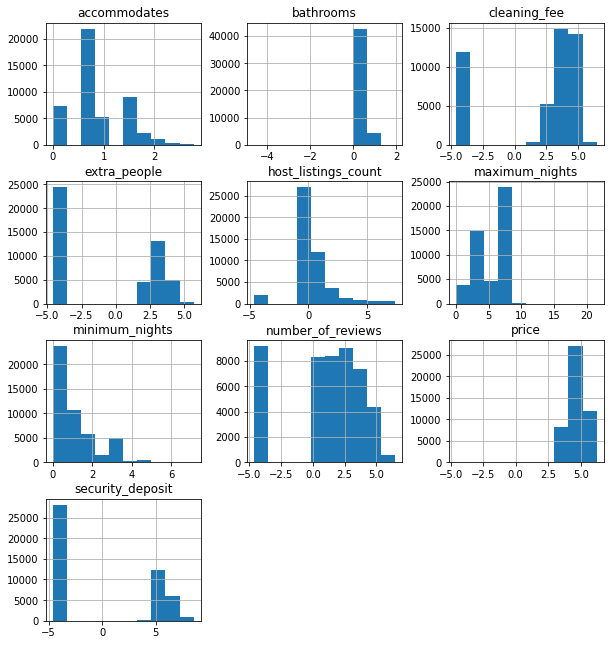

In [526]:
numerical_columns = ['accommodates', 'bathrooms', 'host_listings_count','cleaning_fee', 'extra_people', 'host_days_active', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

transformed_df[numerical_columns].hist(figsize=(10,11));

In [527]:
import seaborn as sns

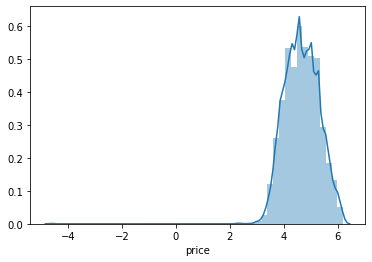

In [528]:
sns.distplot(transformed_df['price'])

In [529]:
transformed_df.columns = transformed_df.columns.str.replace(' ', '_')

In [530]:
transformed_df.columns = transformed_df.columns.str.replace('%', '')

In [531]:
transformed_df.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'host_days_active', 'check_in_24h',
       'air_conditioning', 'balcony', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'Smoked_detection', 'parking',
       'Bathroom_amenities', 'child_friendly', 'Laundry', 'elevator', 'gym',
       'outdoor_space', 'host_greeting', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'Heating', 'accessible',
       'well_lit_entrance', 'essentials',
       'host_response_time_a_few_days_or_more', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour', 'host_response_rate_100',

In [532]:
transformed_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,Smoked_detection,parking,Bathroom_amenities,child_friendly,Laundry,elevator,gym,outdoor_space,host_greeting,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,Heating,accessible,well_lit_entrance,essentials,host_response_time_a_few_days_or_more,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,host_response_rate_100,host_response_rate_50-89,host_response_rate_90-99,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten_Island,property_type_Apartment,property_type_Other,room_type_Entire_home/apt,room_type_Hotel_room,room_type_Shared_room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,instant_bookable_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
0,3647,0.0,0.0,1.0,0.693147,0.0,1.0,5.010635,5.298317,4.317488,2,2.995732,1.098612,1.945910,365,-4.605170,4298.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,3831,0.0,0.0,1.0,1.098612,0.0,1.0,4.488636,6.214608,-4.605170,1,-4.605170,0.000000,6.593045,192,5.631212,4286.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0
2,5022,0.0,0.0,1.0,0.000000,0.0,1.0,4.382027,4.605170,4.382027,1,2.995732,2.302585,4.787492,0,2.197225,4233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1
3,5099,0.0,0.0,0.0,0.693147,0.0,1.0,5.298317,5.703782,4.828314,2,4.605170,1.098612,3.044522,13,4.317488,4229.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0
4,5121,0.0,0.0,0.0,0.693147,0.0,1.0,4.094345,6.109248,-4.605170,1,3.401197,3.806662,6.593045,0,3.891820,4228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1


## Model Building

### Splitting Data

In [533]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression


In [534]:
X = transformed_df.drop(['price'],axis = 1)

y = transformed_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [535]:
X_train.shape


(37769, 70)

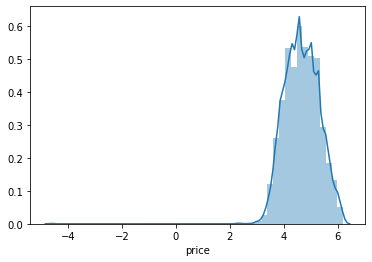

In [536]:
sns.distplot(y)

### Linear Regression

In [537]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [538]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        MAE: {}
        RMSE: {}
        R2 Score: {}
        
     """.format(
        mean_absolute_error(y_test,predicts),
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100
        
        ))


        MAE: 0.2852606838275638
        RMSE: 0.3899573491396097
        R2 Score: 62.223313242807265
        
     


##### Lasso Regression

In [539]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [540]:
def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

lasso_reg(X_train, y_train)

{'alpha': 0.0, 'normalize': True}
-0.15581919401585004


In [541]:
Lasso_x = Lasso(alpha = 0.000001, normalize =True)
Lasso_x.fit(X_train, y_train)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [542]:
#Training Error
pred_Lasso = Lasso_x.predict(X_train) 
print('MAE: %f' % mean_absolute_error(y_train, pred_Lasso))
print('RMSE: %f' % np.sqrt(metrics.mean_squared_error(y_train, pred_Lasso)))
print('R2 %f' % (r2_score(y_train, pred_Lasso)*100) )

MAE: 0.288220
RMSE: 0.393825
R2 62.033384


In [543]:
#Testing Error
pred_Lasso = Lasso_x.predict(X_test) 
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(metrics.mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % (r2_score(y_test, pred_Lasso)*100) )

MAE: 0.285286
RMSE: 0.389899
R2 62.234604


In [544]:
# ## Accuracy after taking antilog
# y_lasso_test_antilog = np.exp(pred_Lasso)
# y_actual_antilog = np.exp(y_test)
# print('MAE: %f'% mean_absolute_error(y_actual_antilog, y_lasso_test_antilog))
# print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_actual_antilog, y_lasso_test_antilog)))  

##### Ridge Regression

In [545]:
from sklearn.linear_model import Ridge


In [546]:
def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x,input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)

ridge_reg(X_train, y_train)

{'alpha': 0.001, 'normalize': True}
-0.15581623846561246


In [547]:
ridge_x = Ridge(alpha = 0.001, normalize = True)
ridge_x.fit(X_train, y_train)  


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [548]:
# Training Error
pred_ridge = ridge_x.predict(X_train) 
print('MAE: %f'% mean_absolute_error(y_train, pred_ridge))
print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_train, pred_ridge)))   
print('R2 %f' % (r2_score(y_train, pred_ridge)*100))

MAE: 0.288206
RMSE: 0.393810
R2 62.036242


In [549]:
#Testing Error
pred_ridge = ridge_x.predict(X_test) 
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % (r2_score(y_test, pred_ridge)*100))

MAE: 0.285262
RMSE: 0.389942
R2 62.226256


In [550]:
# ## Accuracy after taking antilog
# y_ridge_test_antilog = np.exp(pred_ridge)
# y_actual_antilog = np.exp(y_test)
# print('MAE: %f'% mean_absolute_error(y_actual_antilog, y_ridge_test_antilog))
# print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_actual_antilog, y_ridge_test_antilog)))   

#### XGBOOST

In [551]:
# !pip install wrapt --upgrade --ignore-installed

In [552]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
# import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

In [553]:
%tensorflow_version 1.x
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot

In [557]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[16:16:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.1363
Validation MSE: 0.1383

Training r2: 0.6663
Validation r2: 0.6564


In [558]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
pets_allowed,0.000000
private_entrance,0.000000
cancellation_policy_moderate,0.000000
long_term_stays,0.000000
host_greeting,0.000000
...,...
property_type_Other,0.031084
accommodates,0.036487
cleaning_fee,0.041687
neighbourhood_group_cleansed_Manhattan,0.061097


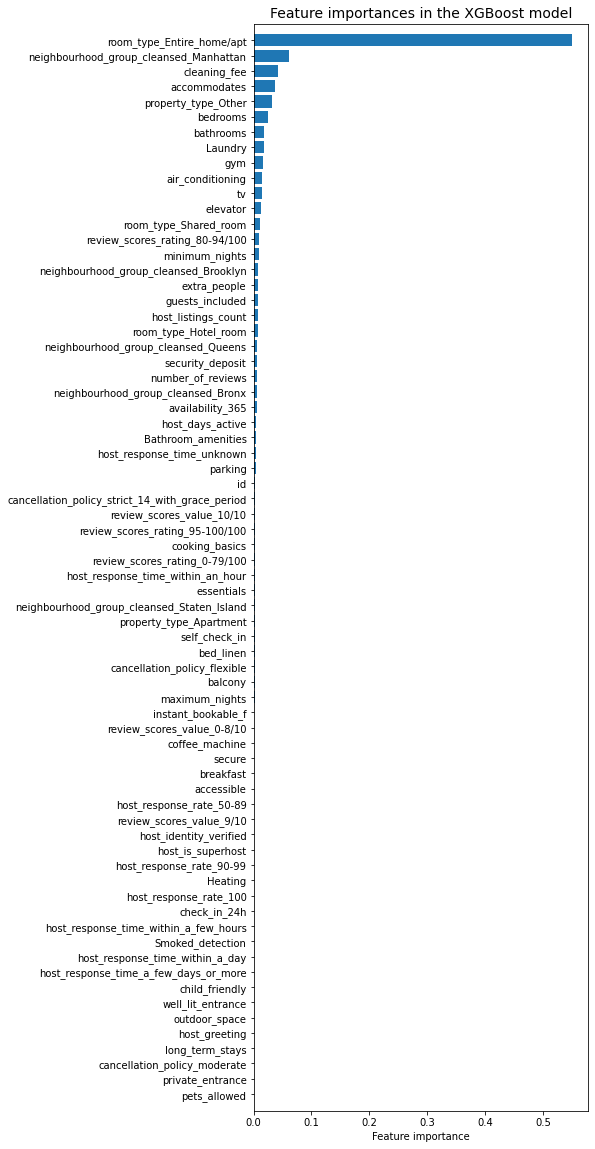

['room_type',
 'bathrooms',
 'neighbourhood_group_cleansed',
 'cleaning_fee',
 'bedrooms',
 'accommodates',
 'property_type',
 'Laundry',
 'gym',
 'elevator',
 'tv',
 'host_is_superhost',
 'review_scores_rating',
 'number_of_reviews',
 'host_listing_count',
 'air_conditioning',
 'extra_people',
 'security_deposite',
 'self_check_in',
 'maximum_nights',
 'guests_included',
 'host_response_time',
 'private_entrances',
 'availability_365',
 'parking',
 'host_days_active',
 'bathroom_amenities',
 'balcony',
 'bed_linen']

In [559]:
# Plotting feature importances
plt.figure(figsize=(6,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

['room_type','bathrooms','neighbourhood_group_cleansed','cleaning_fee',
 'bedrooms','accommodates','property_type','Laundry','gym','elevator',
 'tv','host_is_superhost','review_scores_rating','number_of_reviews','host_listing_count',
 'air_conditioning','extra_people','security_deposite','self_check_in','maximum_nights','guests_included',
 'host_response_time','private_entrances','availability_365','parking','host_days_active','bathroom_amenities',
 'balcony','bed_linen']

In [560]:
testing_preds_xgb_reg = xgb_reg.predict(X_test)

In [561]:
print("""
        Root Mean Squared Error: {}
        R2 Score: {}
        MSE: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, testing_preds_xgb_reg)),
        r2_score(y_test,testing_preds_xgb_reg),
        round(mean_squared_error(y_test, testing_preds_xgb_reg),4),
        mean_absolute_error(y_test,testing_preds_xgb_reg)
        ))


        Root Mean Squared Error: 0.3718816497496759
        R2 Score: 0.6564427293293338
        MSE: 0.1383
        Mean Absolute Error: 0.2686406497338757
     


In [562]:
# ## Accuracy after taking antilog
# y_xgb_test_antilog = np.exp(testing_preds_xgb_reg)
# y_actual_antilog = np.exp(y_test)
# print('MAE: %f'% mean_absolute_error(y_actual_antilog, y_xgb_test_antilog))
# print('RMSE: %f'% np.sqrt(metrics.mean_squared_error(y_actual_antilog, y_xgb_test_antilog)))   

In [563]:
#pickle_out = open("dict.pickle","wb")
# with open('/model.pkl','wb') as f:
#   pickle.dump(xgb_reg, f)

# Neural Network with 3 Layers

In [565]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [566]:
# Separating X and y
X = transformed_df.drop(['price','id'], axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [567]:
# Building the model
nn3 = models.Sequential()
nn3.add(layers.Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
nn3.add(layers.Dense(250, activation='relu'))
nn3.add(layers.Dense(250, activation='relu'))
nn3.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn3.summary())

# Visualising the neural network
#SVG(model_to_dot(nn3, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 100)               7000      
_________________________________________________________________
dense_66 (Dense)             (None, 250)               25250     
_________________________________________________________________
dense_67 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 251       
Total params: 95,251
Trainable params: 95,251
Non-trainable params: 0
_________________________________________________________________
None


In [568]:
# Training the model
nn3_start = time.time()

nn3_history = nn3.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=250,
                  validation_split = 0.2)

nn3_end = time.time()

print(f"Time taken to run: {round((nn3_end - nn3_start)/60,1)} minutes")

Train on 30215 samples, validate on 7554 samples
Epoch 1/100
30215/30215 [==============================] - 2s 60us/step - loss: 1.0981 - mean_squared_error: 1.0981 - val_loss: 0.2644 - val_mean_squared_error: 0.2644
Epoch 2/100
30215/30215 [==============================] - 1s 40us/step - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 3/100
30215/30215 [==============================] - 1s 40us/step - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.1892 - val_mean_squared_error: 0.1892
Epoch 4/100
30215/30215 [==============================] - 1s 47us/step - loss: 0.1735 - mean_squared_error: 0.1735 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 5/100
30215/30215 [==============================] - 2s 51us/step - loss: 0.1616 - mean_squared_error: 0.1616 - val_loss: 0.1681 - val_mean_squared_error: 0.1681
Epoch 6/100
30215/30215 [==============================] - 2s 51us/step - loss: 0.1522 - mean_squared_error: 0.

In [569]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)

    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
#     ax1.plot(list(range(0,500)), list(range(0,500)), color='black', linestyle='--')
    ax1.plot(list(range(1,10)), list(range(1,10)), color='black', linestyle='--')
    ax1.set_title('Validation set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(1,10)), list(range(1,10)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    plt.show()

Training MSE: 0.0607
Validation MSE: 0.2238

Training r2: 0.8513
Validation r2: 0.444


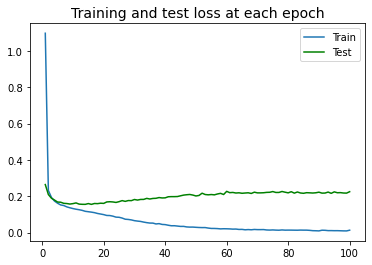

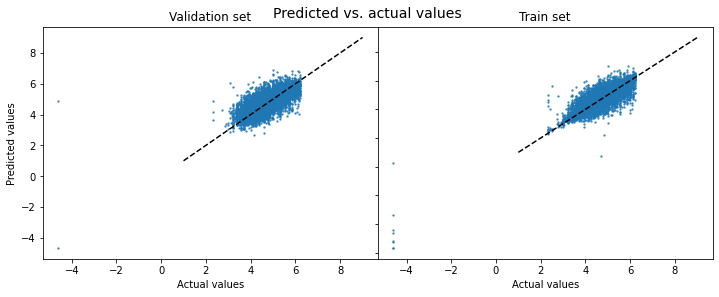

In [570]:
nn_model_evaluation(nn3)

In [571]:
predicts = nn3.predict(X_test)

In [572]:
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predicts)),4))
print("r2:", round(r2_score(y_test, predicts),4))
print("MAE:", round(mean_absolute_error(y_test, predicts),4))
print("MSE:", round(mean_squared_error(y_test, predicts),4))

RMSE: 0.4731
r2: 0.444
MAE: 0.3568
MSE: 0.2238


### Neural Network with 4 Layers

In [573]:
nn4 = models.Sequential()
nn4.add(layers.Dense(150, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(250, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(250, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(500, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn4.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn4.summary())

# Visualising the neural network
# SVG(model_to_dot(nn4, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 150)               10500     
_________________________________________________________________
dense_70 (Dense)             (None, 250)               37750     
_________________________________________________________________
dense_71 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_72 (Dense)             (None, 500)               125500    
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 501       
Total params: 237,001
Trainable params: 237,001
Non-trainable params: 0
_________________________________________________________________
None


In [574]:
# Training the model
nn4_start = time.time()

nn4_history = nn4.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=300,
                  validation_split = 0.1)

nn4_end = time.time()

print(f"Time taken to run: {round((nn4_end - nn4_start)/60,1)} minutes")

Train on 33992 samples, validate on 3777 samples
Epoch 1/100
33992/33992 [==============================] - 4s 103us/step - loss: 38.3044 - mean_squared_error: 1.1405 - val_loss: 19.2315 - val_mean_squared_error: 0.2194
Epoch 2/100
33992/33992 [==============================] - 2s 73us/step - loss: 12.2109 - mean_squared_error: 0.2023 - val_loss: 7.1736 - val_mean_squared_error: 0.1626
Epoch 3/100
33992/33992 [==============================] - 3s 76us/step - loss: 4.7067 - mean_squared_error: 0.1692 - val_loss: 2.8446 - val_mean_squared_error: 0.1501
Epoch 4/100
33992/33992 [==============================] - 2s 73us/step - loss: 1.9562 - mean_squared_error: 0.1746 - val_loss: 1.2765 - val_mean_squared_error: 0.1603
Epoch 5/100
33992/33992 [==============================] - 3s 75us/step - loss: 0.9710 - mean_squared_error: 0.1791 - val_loss: 0.7094 - val_mean_squared_error: 0.1581
Epoch 6/100
33992/33992 [==============================] - 3s 74us/step - loss: 0.6004 - mean_squared_error

Training MSE: 0.1567
Validation MSE: 0.1536

Training r2: 0.6165
Validation r2: 0.6184


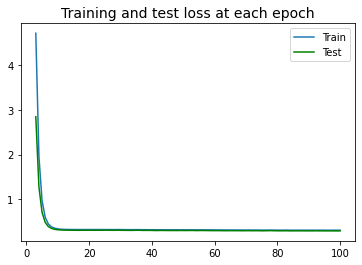

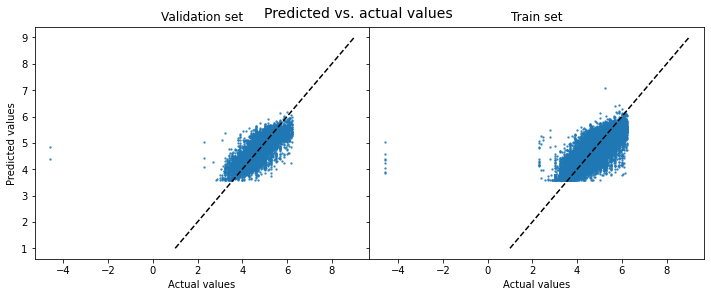

In [575]:
# Evaluating the model
nn_model_evaluation(nn4, skip_epochs=2)

In [576]:
predicts = nn4.predict(X_test)

In [577]:
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predicts)),4))
print("r2:", round(r2_score(y_test, predicts),4))
print("MAE:", round(mean_absolute_error(y_test, predicts),4))

RMSE: 0.3919
r2: 0.6184
MAE: 0.2877


### Neural Network with 5 Layers

In [581]:
nn5 = models.Sequential()
nn5.add(layers.Dense(150, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn5.add(layers.Dense(250, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn5.add(layers.Dense(250, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn5.add(layers.Dense(150, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn5.add(layers.Dense(500, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn5.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn5.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn5.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 150)               10500     
_________________________________________________________________
dense_81 (Dense)             (None, 250)               37750     
_________________________________________________________________
dense_82 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_83 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_84 (Dense)             (None, 500)               75500     
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 501       
Total params: 224,651
Trainable params: 224,651
Non-trainable params: 0
_______________________________________________

In [582]:
# Training the model
nn5_start = time.time()

nn5_history = nn5.fit(X_train,
                  y_train,
                  epochs=50,
                  batch_size=300,
                  validation_split = 0.1)

nn5_end = time.time()

print(f"Time taken to run: {round((nn5_end - nn5_start)/60,1)} minutes")

Train on 33992 samples, validate on 3777 samples
Epoch 1/50
33992/33992 [==============================] - 4s 106us/step - loss: 38.5808 - mean_squared_error: 1.1443 - val_loss: 18.6480 - val_mean_squared_error: 0.2224
Epoch 2/50
33992/33992 [==============================] - 3s 77us/step - loss: 11.9816 - mean_squared_error: 0.2070 - val_loss: 7.3581 - val_mean_squared_error: 0.1666
Epoch 3/50
33992/33992 [==============================] - 2s 74us/step - loss: 5.0832 - mean_squared_error: 0.1693 - val_loss: 3.3185 - val_mean_squared_error: 0.1498
Epoch 4/50
33992/33992 [==============================] - 2s 73us/step - loss: 2.4117 - mean_squared_error: 0.1724 - val_loss: 1.6966 - val_mean_squared_error: 0.1620
Epoch 5/50
33992/33992 [==============================] - 3s 75us/step - loss: 1.3402 - mean_squared_error: 0.1810 - val_loss: 1.0278 - val_mean_squared_error: 0.1620
Epoch 6/50
33992/33992 [==============================] - 2s 73us/step - loss: 0.8695 - mean_squared_error: 0.17

Training MSE: 0.1567
Validation MSE: 0.1531

Training r2: 0.6164
Validation r2: 0.6197


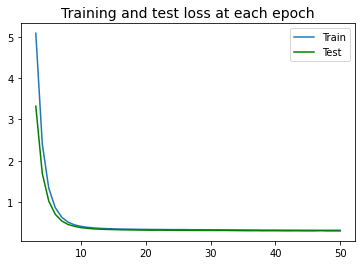

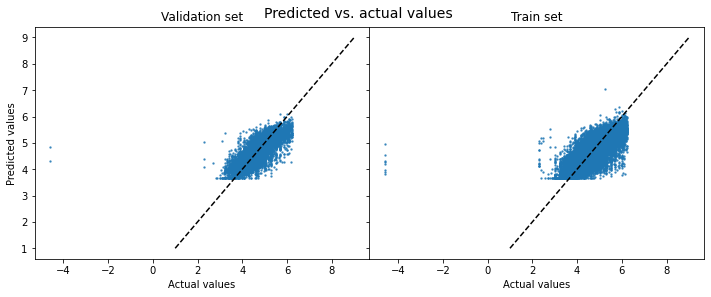

In [583]:
# Evaluating the model
nn_model_evaluation(nn5, skip_epochs=2)

In [584]:
predicts = nn5.predict(X_test)

In [585]:
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predicts)),4))
print("r2:", round(r2_score(y_test, predicts),4))
print("MAE:", round(mean_absolute_error(y_test, predicts),4))

RMSE: 0.3912
r2: 0.6197
MAE: 0.2872


##### Using Batch Normalization

In [ ]:
from keras.layers import BatchNormalization

In [586]:
nn4_bn = models.Sequential()
nn4_bn.add(layers.Dense(150, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4_bn.add(layers.Dense(250, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4_bn.add(layers.Dense(250, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4_bn.add(layers.Dense(500, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn4_bn.add(BatchNormalization())
nn4_bn.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn4_bn.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn4_bn.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 150)               10500     
_________________________________________________________________
dense_87 (Dense)             (None, 250)               37750     
_________________________________________________________________
dense_88 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_89 (Dense)             (None, 500)               125500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 500)               2000      
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 501       
Total params: 239,001
Trainable params: 238,001
Non-trainable params: 1,000
___________________________________________

In [587]:
nn4_bn_start = time.time()

nn4_bn_history = nn4_bn.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=300,
                  validation_split = 0.1)

nn4_bn_end = time.time()

print(f"Time taken to run: {round((nn4_bn_end - nn4_bn_start)/60,1)} minutes")

Train on 33992 samples, validate on 3777 samples
Epoch 1/100
33992/33992 [==============================] - 4s 125us/step - loss: 41.1243 - mean_squared_error: 7.4658 - val_loss: 13.8064 - val_mean_squared_error: 0.4000
Epoch 2/100
33992/33992 [==============================] - 3s 86us/step - loss: 6.7977 - mean_squared_error: 0.1759 - val_loss: 2.9533 - val_mean_squared_error: 0.3453
Epoch 3/100
33992/33992 [==============================] - 3s 84us/step - loss: 1.5841 - mean_squared_error: 0.1578 - val_loss: 1.0521 - val_mean_squared_error: 0.3115
Epoch 4/100
33992/33992 [==============================] - 3s 83us/step - loss: 0.6616 - mean_squared_error: 0.1566 - val_loss: 0.6091 - val_mean_squared_error: 0.2652
Epoch 5/100
33992/33992 [==============================] - 3s 84us/step - loss: 0.4282 - mean_squared_error: 0.1571 - val_loss: 0.4227 - val_mean_squared_error: 0.2035
Epoch 6/100
33992/33992 [==============================] - 3s 87us/step - loss: 0.3499 - mean_squared_error:

Training MSE: 0.1533
Validation MSE: 0.1512

Training r2: 0.6247
Validation r2: 0.6243


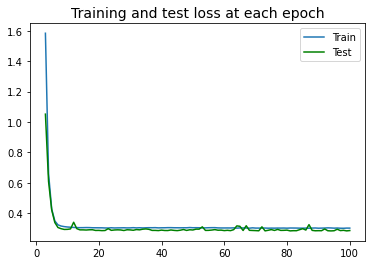

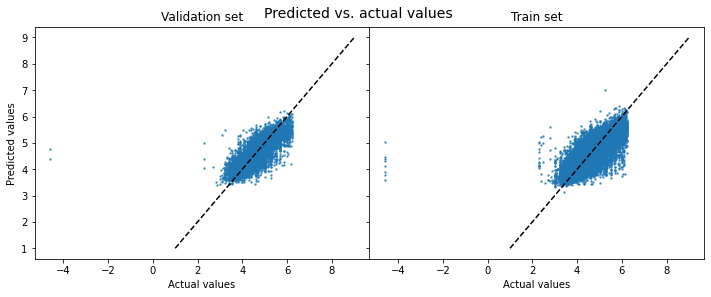

In [588]:
#Model Evaluation
nn_model_evaluation(nn4_bn, skip_epochs=2)

In [ ]:
predicts = nn4_bn.predict(X_test)

In [589]:
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predicts)),4))
print("r2:", round(r2_score(y_test, predicts),4))
print("MAE:", round(mean_absolute_error(y_test, predicts),4))

RMSE: 0.3912
r2: 0.6197
MAE: 0.2872


#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [590]:
model = RandomForestRegressor(random_state=0, n_estimators = 100)
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [595]:
# Get the mean absolute error on the validation data
predicted_prices = model.predict(X_test)
MAE = mean_absolute_error(y_test , predicted_prices)
print('MAE = ', round(MAE,4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predicted_prices)),4))
print("r2:", round(r2_score(y_test, predicted_prices),4))

MAE =  0.2526
RMSE: 0.351
r2: 0.694


In [592]:
import matplotlib.pyplot as plt
%matplotlib inline

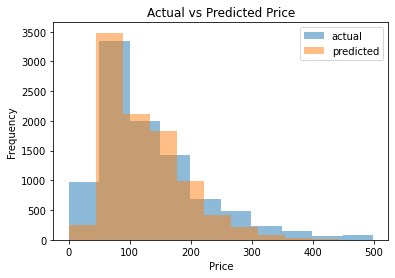

In [596]:
y_test_untransformed = np.exp(y_test)
predicted_untransformed = np.exp(predicted_prices)
plt.hist(y_test_untransformed, label = 'actual', alpha = 0.5)
plt.hist(predicted_untransformed, label = 'predicted', alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Price')
plt.legend(loc = 'best')
plt.show()

The Random Forest Regressor gives the best accuracy.